In [37]:
# 自定义层

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.0
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0
<class 'keras.layers.core.dense.Dense'>
tf.Tensor(
[[ 0.10860717 -0.345407    0.11919898  0.294142   -0.29423285 -0.3515573
  -0.46077174  0.11440361 -0.03083785  0.04153284  0.23597123 -0.07134953
  -0.13377045 -0.72210073  0.34908006  0.00433704 -0.36732918  0.20677091
  -0.02276304  0.12004274  0.42766792  0.00399105 -0.04059648  0.12218079
   0.04533079  0.6346492  -0.3918472   0.72079486  0.08674901 -0.60152835
   0.15266481 -0.28053784 -0.15742873 -0.4798664   0.2615144   0.36090735
   0.41835672  0.2558571  -0.5394327  -0.14811723 -0.07773101 -0.34414667
   0.12434019  0.06236151 -0.28076607  0.02970403  0.14144294  0.18004395
  -0.7036964  -0.17120178  0.03705919  0.2505406  -0.5319016  -0.34195673
   0.01729828 -0.13068458  0.06959522 -0.14256722  0.29180518  0.30570564
  -0.09967875 -0.14121923 -0

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

##%
# layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=(None, 5))  # input_shape一般第一层指定
print(type(layer))
# layer是输入为5，输出为100的全连接层，所以对于输入为10x5的矩阵来看，会乘以一个5x100的矩阵，所以输出就是10x100.
print(layer(tf.ones((10, 5))))

In [38]:
# layer中的所有变量
print(layer.variables)
print('-' * 50)
# 获得layer中所有可训练的变量
print(layer.trainable_variables)
print('-' * 50)
# y=x*w+b kernel就是w，b就是bias
print(layer.kernel)
print(layer.kernel.numpy())
print(layer.bias)

[<tf.Variable 'dense_4/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[-0.08350298, -0.00509819,  0.16447957,  0.16425262,  0.04264365,
        -0.16489694, -0.17840734,  0.19816692, -0.1554532 , -0.08989593,
        -0.00884536,  0.07304944,  0.2236724 , -0.15256035,  0.07821853,
        -0.2194381 , -0.14175776,  0.0174586 , -0.20500953,  0.09377475,
         0.19741727,  0.18165897,  0.10148732,  0.16925524, -0.04202066,
         0.11553274,  0.13027509, -0.04763743,  0.03767364, -0.21241629,
         0.18149851, -0.06523617, -0.2272899 , -0.17403856,  0.11041494,
         0.08355667,  0.22047453, -0.14988482, -0.07838576,  0.1126114 ,
        -0.04023725,  0.18866448,  0.01664479, -0.02578133, -0.14819607,
         0.15965079, -0.01129816,  0.02399836, -0.12079751, -0.14355856,
         0.03820743,  0.05475055, -0.06173025, -0.08069049, -0.23805833,
        -0.0421652 ,  0.09189336,  0.10197867,  0.09042694, -0.16832335,
         0.02321209,  0.23371972,  0.16652687,  0.0506

In [39]:
print(help(layer))

Help on Dense in module keras.layers.core.dense object:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `ker

In [40]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [41]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [43]:
# 逐元素计算softplus(x) = log(exp(x) + 1)
customized_softplus = keras.layers.Lambda(lambda x: tf.math.log(tf.math.exp(x) + 1))
print(customized_softplus([-10., -5., 0., 5., 10.]))
for i in [-10., -5., 0., 5., 10.]:
    print(np.log(np.exp(i) + 1), end=' ')

tf.Tensor([4.5417706e-05 6.7153494e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)
4.5398899216870535e-05 0.006715348489117967 0.6931471805599453 5.006715348489118 10.000045398899218 

In [44]:
# customized Dense layer
class CustomizedDenseLayer(keras.layers.Layer):
    """outputs = activation(inputs * kernel + bias)"""

    def __init__(self, units, activation=None, **kwargs):
        self.units = units  # 输出空间的维数 （神经元个数）
        self.activation = keras.layers.Activation(activation) # 借助tf提供的激活函数
        super(CustomizedDenseLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        """构建所需要的参数，kernel和bias"""
        # y=x*w+b input_shape:[None,m] w:[m,n] output_shape:[None,n]
        print('-' * 50)
        print(input_shape)
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',  # 使用均匀分布的方法去初始化kernel
                                      trainable=True)
        self.bias = self.add_weight(name='kernel',
                                    shape=(self.units,),
                                    initializer='zeros',
                                    trainable=True)
        # 继承父类的build方法
        super(CustomizedDenseLayer, self).build(input_shape)

    def call(self, x):
        """完成正向计算"""
        return self.activation(x @ self.kernel + self.bias)

In [45]:
model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu', input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1, activation=customized_softplus), ])
# 输出层等价于下面的写法
# keras.layers.Dense(1, activation="softplus")  #一层
# keras.layers.Dense(1), keras.layers.Activation('softplus')  #两层

--------------------------------------------------
(None, 8)
--------------------------------------------------
(None, 30)


In [46]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 customized_dense_layer_6 (C  (None, 30)               270       
 ustomizedDenseLayer)                                            
                                                                 
 customized_dense_layer_7 (C  (None, 1)                31        
 ustomizedDenseLayer)                                            
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
model.compile(loss='mse', optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]
history = model.fit(x_train_scaled, y_train,
                    validation_data=(x_valid_scaled, y_valid),
                    epochs=10, callbacks=callbacks)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.1932 - val_loss: 0.6761
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5890 - val_loss: 0.5850
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5181 - val_loss: 0.5227
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4773 - val_loss: 0.4940
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4572 - val_loss: 0.4976
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4517 - val_loss: 0.4803
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4330 - val_loss: 0.4778
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4241 - val_loss: 0.4343
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4159 - val_loss: 0.4414
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4081 - val_loss: 0.4232

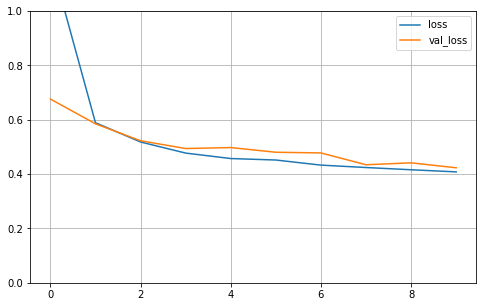

In [48]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


plot_learning_curves(history)

In [49]:
print(model.evaluate(x_test_scaled, y_test, verbose=0))

0.42240023612976074
